In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from loguru import logger
import pandas as pd

from exonamd.run import *
from exonamd.plot import pop_plot, simple_plot
from exonamd.solve import solve_namd_mc

from pathlib import Path

In [3]:
file_path = "/home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/custom_db_20250811.csv"

df_exo = pd.read_csv(file_path)

print(df_exo.hostname.unique())
print(df_exo.hostname.nunique())

print(df_exo.groupby("sy_pnum").hostname.nunique())

['WASP-84' 'TOI-1136' 'TOI-5398' 'WASP-47' 'TOI-2076' 'TOI-942' 'HD 3167'
 'Kepler-56' 'WASP-148' 'TOI-451' 'K2-290' 'Kepler-462' 'SS' 'TOI-2202'
 'HD 118203' 'HIP 41378' 'TOI-421' 'AU Mic']
18
sy_pnum
2    10
3     3
4     2
5     1
6     1
8     1
Name: hostname, dtype: int64


In [4]:
df_interp = interp_db(df=df_exo, out_path=Path(file_path).parent / "custom_db_20250811_interp.csv")

2025-08-12 20:27:54.232 | INFO     | exonamd.run:interp_db:170 - Thinning down the data with nanmedian
2025-08-12 20:27:54.235 | WARNING  | exonamd.run:interp_db:173 - NaT values in rowupdate: 55
2025-08-12 20:27:54.255 | INFO     | exonamd.run:interp_db:182 - Data thinned down
2025-08-12 20:27:54.256 | INFO     | exonamd.run:interp_db:184 - Checking for duplicates
2025-08-12 20:27:54.259 | INFO     | exonamd.run:interp_db:192 - No duplicates found
2025-08-12 20:27:54.260 | INFO     | exonamd.run:interp_db:194 - Instantiating the flags
2025-08-12 20:27:54.261 | INFO     | exonamd.run:interp_db:196 - Flags instantiated
2025-08-12 20:27:54.262 | INFO     | exonamd.run:interp_db:198 - Interpolating missing eccentricity values


Pandas Apply:   0%|          | 0/54 [00:00<?, ?it/s]

2025-08-12 20:27:54.305 | INFO     | exonamd.run:interp_db:207 - Values interpolated
2025-08-12 20:27:54.307 | INFO     | exonamd.run:interp_db:209 - Interpolating missing planetary mass values


Pandas Apply:   0%|          | 0/54 [00:00<?, ?it/s]

2025-08-12 20:27:55.221 | INFO     | exonamd.run:interp_db:218 - Values interpolated
2025-08-12 20:27:55.222 | DEBUG    | exonamd.run:interp_db:220 - Dropping columns that are no longer needed
2025-08-12 20:27:55.224 | DEBUG    | exonamd.run:interp_db:222 - Columns dropped
2025-08-12 20:27:55.225 | INFO     | exonamd.run:interp_db:224 - Removing systems where at least one planet has no mass or semi-major axis
2025-08-12 20:27:55.237 | INFO     | exonamd.run:interp_db:233 - Removing 0 systems: []
2025-08-12 20:27:55.238 | INFO     | exonamd.run:interp_db:235 - Systems removed
2025-08-12 20:27:55.239 | INFO     | exonamd.run:interp_db:237 - Interpolating missing values in inclinations


Pandas Apply:   0%|          | 0/54 [00:00<?, ?it/s]

2025-08-12 20:27:55.356 | INFO     | exonamd.run:interp_db:246 - Values interpolated
2025-08-12 20:27:55.358 | INFO     | exonamd.run:interp_db:248 - Interpolating missing values in semi-major axis uncertainties


Pandas Apply:   0%|          | 0/54 [00:00<?, ?it/s]

2025-08-12 20:27:55.394 | INFO     | exonamd.run:interp_db:256 - Values interpolated
2025-08-12 20:27:55.396 | INFO     | exonamd.run:interp_db:259 - Computing the relative inclinations


Pandas Apply:   0%|          | 0/54 [00:00<?, ?it/s]

2025-08-12 20:27:55.509 | INFO     | exonamd.run:interp_db:267 - Values computed
2025-08-12 20:27:55.510 | INFO     | exonamd.run:interp_db:269 - Interpolating missing values in true obliquity


Pandas Apply:   0%|          | 0/54 [00:00<?, ?it/s]

2025-08-12 20:27:55.651 | INFO     | exonamd.run:interp_db:278 - Values interpolated
2025-08-12 20:27:55.652 | INFO     | exonamd.run:interp_db:281 - Storing the curated+interpolated database
2025-08-12 20:27:55.657 | INFO     | exonamd.run:interp_db:286 - Database stored at /home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/custom_db_20250811_interp.csv


2025-08-12 20:30:20.838 | DEBUG    | exonamd.run:calc_namd:331 - Dropping columns that are no longer needed
2025-08-12 20:30:20.842 | DEBUG    | exonamd.run:calc_namd:333 - Columns dropped
2025-08-12 20:30:20.843 | INFO     | exonamd.run:calc_namd:353 - Computing the absolute NAMD
2025-08-12 20:30:20.909 | INFO     | exonamd.run:calc_namd:361 - Absolute NAMD computed
2025-08-12 20:30:20.933 | INFO     | exonamd.run:calc_namd:455 - Computing the Monte Carlo absolute NAMD
2025-08-12 20:30:21.043 | INFO     | exonamd.run:calc_namd:466 - Absolute NAMD computed


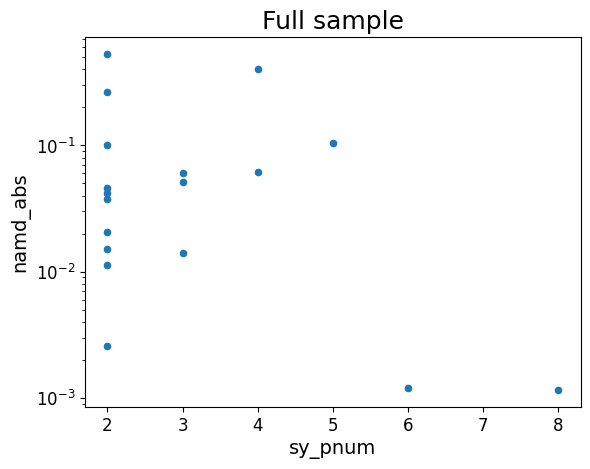

In [13]:
df_namd = calc_namd(
    df=df_interp,
    save=False,
    plot=True,
    core=False,
    filt=None,
    which=["abs"],
    # which=["rel", "abs"],
    threshold=100,
    # use_trunc_normal=False,
    use_trunc_normal=True,
    Npt=int(1e3),
)

2025-08-12 20:30:21.615 | INFO     | __main__:<module>:1 - Plotting the relative NAMD vs. multiplicity


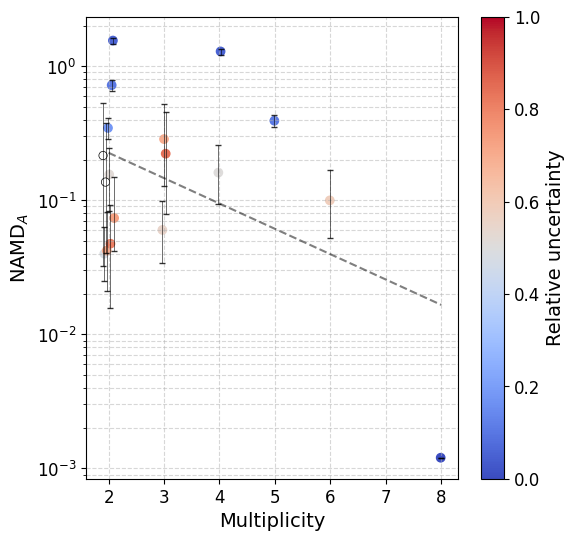

2025-08-12 20:30:22.470 | INFO     | __main__:<module>:15 - Plot done


In [14]:
logger.info("Plotting the relative NAMD vs. multiplicity")
pop_plot(
    df=df_namd.groupby("hostname").apply(
        lambda g: g.select_dtypes(exclude=["object"]).mean(),
        include_groups=False,
    ),
    kind="abs",
    # title="Core planets",
    which="namd",
    yscale="log",
    outpath="/home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/plots/exo_namd_abs_paper.pdf",
    replace_nan=True,
    xoffs=0.1,
)
logger.info("Plot done")